Epoch 1/10
192/192 [==============================] - 3s 12ms/step - loss: 0.3817 - accuracy: 0.8923 - val_loss: 0.1934 - val_accuracy: 0.9440
Epoch 2/10
192/192 [==============================] - 2s 11ms/step - loss: 0.1476 - accuracy: 0.9569 - val_loss: 0.1349 - val_accuracy: 0.9601
Epoch 3/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0980 - accuracy: 0.9720 - val_loss: 0.1123 - val_accuracy: 0.9661
Epoch 4/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0715 - accuracy: 0.9794 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 5/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0873 - val_accuracy: 0.9735
Epoch 6/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0411 - accuracy: 0.9881 - val_loss: 0.0915 - val_accuracy: 0.9738
Epoch 7/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0313 - accuracy: 0.9912 - val_loss: 0.0833 - val_accuracy: 0.9771

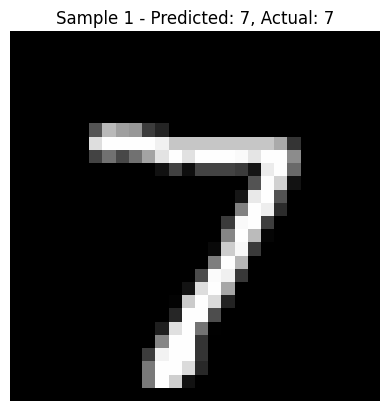

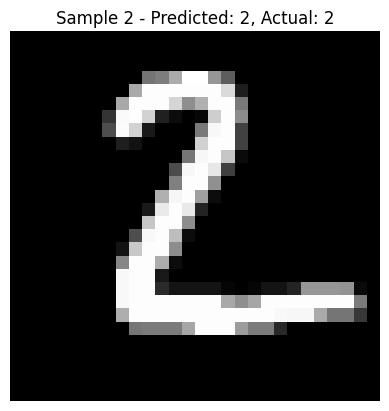

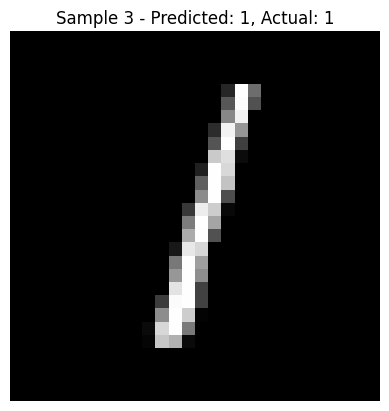

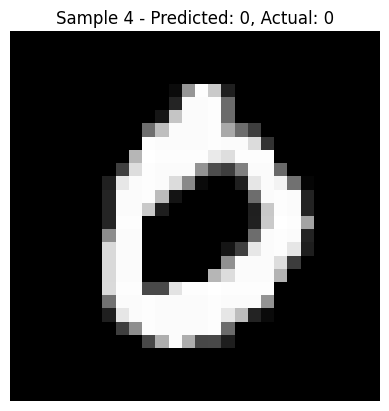

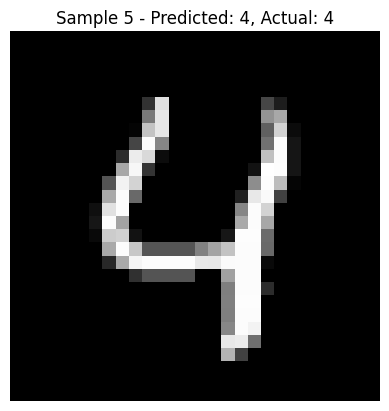

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

feature_vector_length = 784
num_classes = 10

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], feature_vector_length).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], feature_vector_length).astype('float32') / 255

Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Dense(350, input_shape=(feature_vector_length,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[:5], axis=1)

for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()
